In [ ]:
# To install the package
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import requests
import os
import pandas as pd
import numpy as np
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup

In [ ]:
# The URL from which the data is scrapped.
URL = requests.get("https://en.wikipedia.org/wiki/Twitter")
print(URL.status_code)
 
# To display the content of the scrapped data.
print(URL.content)

# Storing the contents into a variable.
ds_text = BeautifulSoup(URL.content, 'html.parser').text

200
b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Twitter - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"510523b7-3ecd-4d16-9618-193f645ec6e5","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Twitter","wgTitle":"Twitter","wgCurRevisionId":1135791731,"wgRevisionId":1135791731,"wgArticleId":9988187,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback links","Pages with login required references or sources","CS1 German-language sources (de)","CS1 maint: uses authors parameter","CS1

In [ ]:
# Algorithms for cleaning up the scrapped data from the websites.
# includes Basic cleaning, Tokenization, stemming, lemmatization, Removing stopwords.

def basic_clean(string):
    '''
    This function takes in a string and
    returns the string normalized.
    '''
    string = unicodedata.normalize('NFKD', string)\
             .encode('ascii', 'ignore')\
             .decode('utf-8', 'ignore')
    string = re.sub(r'[^\w\s]', '', string).lower()
    return string

def tokenize(string):
    '''
    This function takes in a string and
    returns a tokenized string.
    '''
    # Create tokenizer.
    tokenizer = nltk.tokenize.ToktokTokenizer()

    # Use tokenizer
    string = tokenizer.tokenize(string, return_str = True)

    return string

def stem(string):
    '''
    This function takes in a string and
    returns a string with words stemmed.
    '''
    # Create porter stemmer.
    ps = nltk.porter.PorterStemmer()
    
    # Use the stemmer to stem each word in the list of words we created by using split.
    stems = [ps.stem(word) for word in string.split()]
    
    # Join our lists of words into a string again and assign to a variable.
    string = ' '.join(stems)
    
    return string

def lemmatize(string):
    '''
    This function takes in string for and
    returns a string with words lemmatized.
    '''
    # Create the lemmatizer.
    wnl = nltk.stem.WordNetLemmatizer()

    # Use the lemmatizer on each word in the list of words we created by using split.
    lemmas = [wnl.lemmatize(word) for word in string.split()]

    # Join our list of words into a string again and assign to a variable.
    string = ' '.join(lemmas)
    
    return string

def remove_stopwords(string, extra_words = [], exclude_words = []):
    '''
    This function takes in a string, optional extra_words and exclude_words parameters
    with default empty lists and returns a string.
    '''
    # Create stopword_list.
    stopword_list = stopwords.words('english')
    
    # Remove 'exclude_words' from stopword_list to keep these in my text.
    stopword_list = set(stopword_list) - set(exclude_words)
    
    # Add in 'extra_words' to stopword_list.
    stopword_list = stopword_list.union(set(extra_words))

    # Split words in string.
    words = string.split()
    
    # Create a list of words from my string with stopwords removed and assign to variable.
    filtered_words = [word for word in words if word not in stopword_list]
    
    # Join words in the list back into strings and assign to a variable.
    string_without_stopwords = ' '.join(filtered_words)
    
    return string_without_stopwords

def clean(text):
    '''
    This function combines the above steps and added extra stop words to clean text
    '''
    return remove_stopwords(lemmatize(basic_clean(text)))


In [ ]:
type(ds_text)

str

In [ ]:
# Downloading the required packages
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
ds_text = clean(ds_text)
print(ds_text)

twitter wikipedia documentdocumentelementclassnameclientjsrlconfwgbreakframesfalsewgseparatortransformtablewgdigittransformtablewgdefaultdateformatdmywgmonthnamesjanuaryfebruarymarchaprilmayjunejulyaugustseptemberoctobernovemberdecemberwgrequestid510523b73ecd4d169618193f645ec6e5wgcspnoncefalsewgcanonicalnamespacewgcanonicalspecialpagenamefalsewgnamespacenumber0wgpagenametwitterwgtitletwitterwgcurrevisionid1135791731wgrevisionid1135791731wgarticleid9988187wgisarticletruewgisredirectfalsewgactionviewwgusernamenullwgusergroupswgcategorieswebarchive template wayback linkspages login required reference sourcescs1 germanlanguage source decs1 maint us author parametercs1 italianlanguage source itcs1 maint bot original url status unknownarticles short description short description different wikidatawikipedia indefinitely semiprotected pageswikipedia indefinitely moveprotected pagesgood articlesuse american english june 2015all wikipedia article written american englishuse mdy date december 202

In [ ]:
ds_text = 'hello hi how you are hi hello hi nice to meet you have a great day'

In [ ]:
{i:ds_text.split().count(i) for i in ds_text.split()}

{'hello': 2,
 'hi': 3,
 'how': 1,
 'you': 2,
 'are': 1,
 'nice': 1,
 'to': 1,
 'meet': 1,
 'have': 1,
 'a': 1,
 'great': 1,
 'day': 1}

In [ ]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

In [ ]:
# Mask that can be put over the word cloud. These are png that can be downloaded from the internet. 
# Search mask for word cloud inorder to get such images.
# ds_mask = np.array(Image.open('/content/album-1296177__340.webp'))

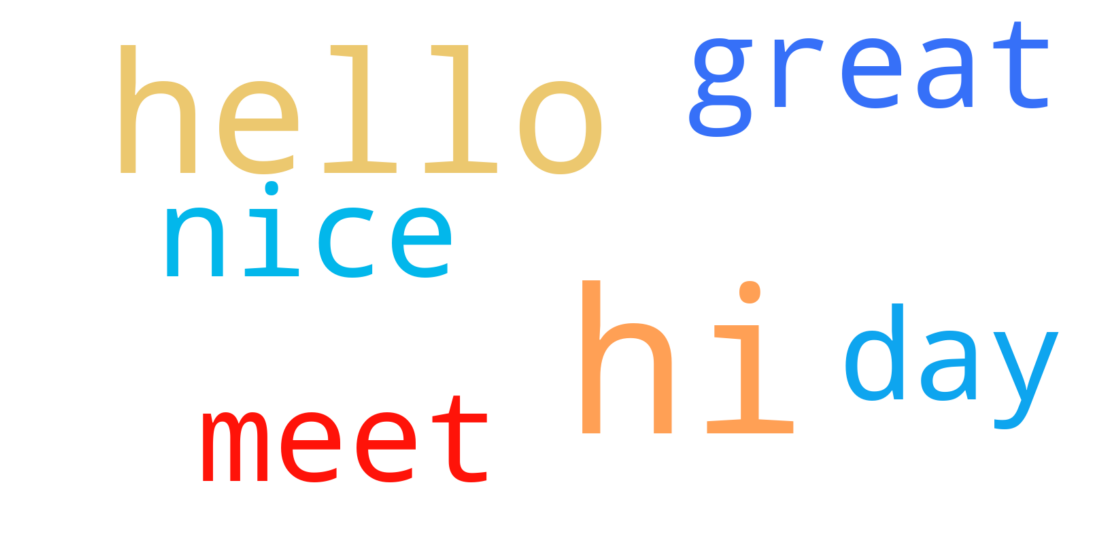

In [ ]:
wc = WordCloud(width=1600, height=800, background_color='white', contour_width=1, contour_color='white', colormap = 'rainbow').generate(ds_text)
plt.figure(figsize=[20,10])
plt.tight_layout(pad=0)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()